# Introduction

In the previous Notebook, we created a dataset of performances by ETF. In this Notebook, we will start to create a very simple model to at least validate that this method works.

# Simulator

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import datetime

In [2]:
df = pd.read_csv("F:/data/trading/perfs.csv", index_col = 0)
df.index = pd.to_datetime(df.index, format="%Y-%m-%d")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 262 entries, 2013-11-04 to 2018-11-05
Columns: 156 entries, AIA to YLCO
dtypes: float64(156)
memory usage: 321.4 KB


In [4]:
df.head()

,AIA,ALTY,BBH,BND,BNDX,BOTZ,CACG,CATH,CFO,CIBR,...,VGSH,VIDI,VIGI,VMBS,VNQI,VUSE,VWOB,VYMI,XT,YLCO
date,,,,,,,,,,,,,,,,,,,,,
2013-11-04,1.000000,NaN,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,...,1.000000,1.000000,NaN,1.000000,1.000000,NaN,1.000000,NaN,NaN,NaN
2013-11-11,0.986157,NaN,0.974592,0.996934,0.997845,NaN,NaN,NaN,NaN,NaN,...,0.999969,0.992490,NaN,0.997100,0.987288,NaN,0.992161,NaN,NaN,NaN
2013-11-18,0.988175,NaN,0.990123,0.996630,0.997840,NaN,NaN,NaN,NaN,NaN,...,1.000328,0.975841,NaN,0.996904,0.989034,NaN,0.983264,NaN,NaN,NaN
2013-11-25,1.010869,NaN,1.027741,0.997411,0.997802,NaN,NaN,NaN,NaN,NaN,...,1.000810,0.985741,NaN,0.998178,0.983724,NaN,0.988082,NaN,NaN,NaN
2013-12-02,1.016058,NaN,1.061193,0.998075,0.998993,NaN,NaN,NaN,NaN,NaN,...,1.000607,0.988227,NaN,0.994878,0.975501,NaN,0.988906,NaN,NaN,NaN


For this model we will use an history of 6 months (=26 weeks) and update our portfolio every 4 weeks. We won't consider any taxes.

In [36]:
history_used = 26         # 6 months
steps = 4                 # change etf every 4 weeks
benefits = 1              # starting performance
current_ETF = None
results = []              # Store our current porfolio performance by 4 weeks
posX = []                 # Dates for the plot
ETF_list = []             # list of ETFs

for week in range(history_used, len(df), steps):
    posX.append(df.index[week])
    
    # get the benefits of the last 4 weeks
    if current_ETF is not None:
        benefits *= (df.iloc[week][current_ETF] / df.iloc[week-4][current_ETF])
    results.append(benefits)
    
    # get the trend over the last 26 weeks
    trend = df.iloc[week-1]/df.iloc[week-history_used]
    to_buy = trend.argmax()
    date = df.index[week]
    if current_ETF != to_buy:
        print("{} - Buy {} - R {:.3f}".format(date, to_buy, benefits))
        current_ETF = to_buy
    else:
        print("{} - Keep {} - R {:.3f}".format(date, to_buy, benefits))
    ETF_list.append(current_ETF)

2014-05-05 00:00:00 - Buy PPH - R 1.000
2014-06-02 00:00:00 - Keep PPH - R 0.998
2014-06-30 00:00:00 - Buy SILJ - R 1.031
2014-07-28 00:00:00 - Buy TUR - R 1.053
2014-08-25 00:00:00 - Buy HEWG - R 0.961
2014-09-22 00:00:00 - Buy TUR - R 0.994
2014-10-20 00:00:00 - Buy BBH - R 0.948
2014-11-17 00:00:00 - Keep BBH - R 1.091
2014-12-15 00:00:00 - Keep BBH - R 1.137
2015-01-12 00:00:00 - Keep BBH - R 1.125
2015-02-09 00:00:00 - Keep BBH - R 1.142
2015-03-09 00:00:00 - Keep BBH - R 1.233
2015-04-06 00:00:00 - Buy HEWG - R 1.224
2015-05-04 00:00:00 - Buy MCHI - R 1.177
2015-06-01 00:00:00 - Keep MCHI - R 1.141
2015-06-29 00:00:00 - Buy QQQC - R 1.078
2015-07-27 00:00:00 - Buy SYBT - R 0.939
2015-08-24 00:00:00 - Keep SYBT - R 0.903
2015-09-21 00:00:00 - Buy KBWP - R 0.900
2015-10-19 00:00:00 - Buy SYBT - R 0.925
2015-11-16 00:00:00 - Keep SYBT - R 0.981
2015-12-14 00:00:00 - Buy PSCU - R 0.960
2016-01-11 00:00:00 - Keep PSCU - R 0.976
2016-02-08 00:00:00 - Keep PSCU - R 1.021
2016-03-07 00:0

Now let's plot the resulting perf in comparison of all other ETFs.

In [37]:
used = np.unique(ETF_list)
not_used = np.setdiff1d(df.columns, used)

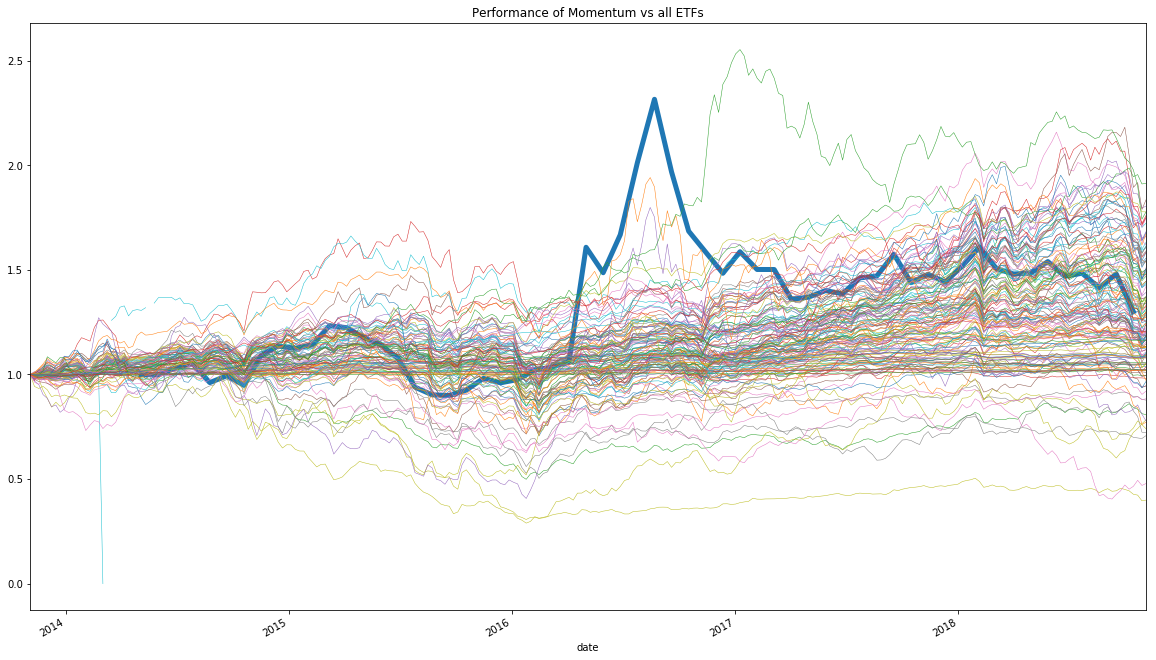

In [38]:
fig, ax1 = plt.subplots(1, 1, figsize=(20,12))
ax1.plot(posX, results, linewidth=5.0)
df.plot(ax=ax1, linewidth=0.5, legend=False)
plt.title("Performance of Momentum vs all ETFs")
plt.show()

We can see that the performance is not that good. To understand it, we can plot it only with used ETFs

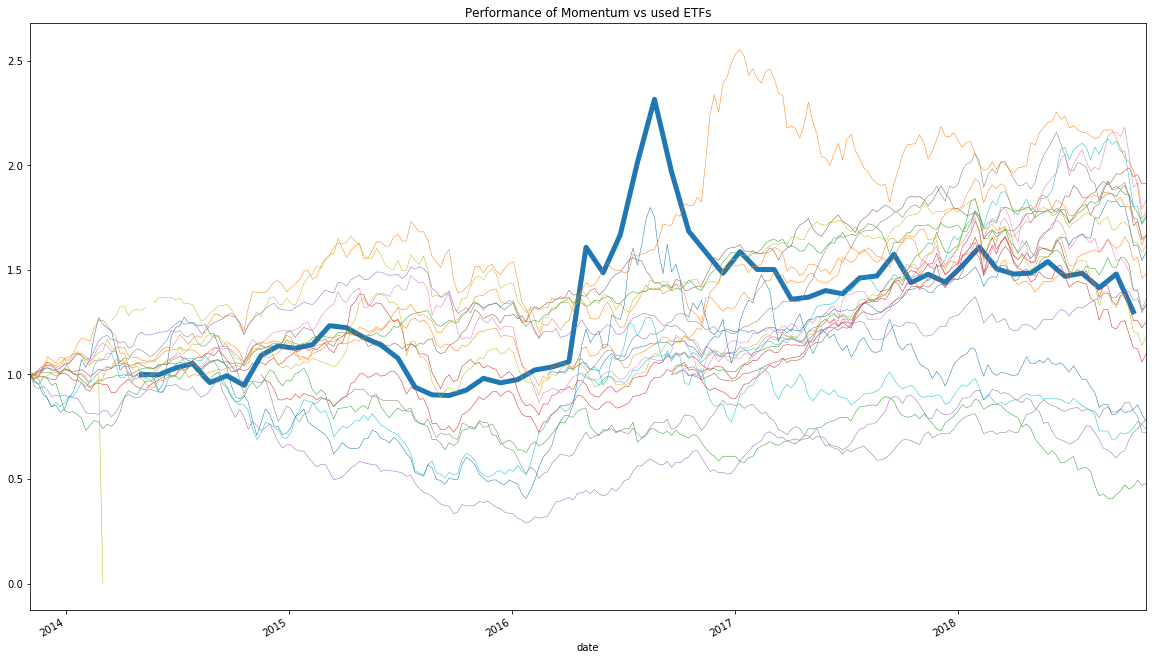

In [39]:
fig, ax1 = plt.subplots(1, 1, figsize=(20,12))
ax1.plot(posX, results, linewidth=5.0)
df[used].plot(ax=ax1, linewidth=0.5, legend=False)
plt.title("Performance of Momentum vs used ETFs")
plt.show()

And here we can see that we bet on bad ETF like the violet one on the bottom. This is because in between 26 weeks, it probably got the best performance "by luck". It can be also represented below:
    
<img src="momentum_bad.png"/>

To finith the evaluation, we can compute the average performance we can compute as follow:

\begin{align}
Perf_{global} &= \prod_{month=0}^{N}Perf[month] \\
\ & = \prod_{month=0}^{N}Perf_{eq}\\
\ & = (Perf_{eq})^{N} \\
\ log(Perf_{global}) & = log((Perf_{eq})^{N}) \\
\ & = N * log((Perf_{eq})\\
\end{align}

\begin{align}
log(Perf_{eq}) &= \frac{log(Perf_{global})}{N} \\
\ Perf_{eq} & = exp(\frac{log(Perf_{global})}{N})\\
\end{align}

In [40]:
p = np.exp(np.log(results[-1])/len(results))**12
print("Perfs annuelles lissées : {:.3f}%".format((p-1)*100))

Perfs annuelles lissées : 5.482%


5.4 % is quite good but we know that we took wrong decision in the choice of ETFs.

# Show unstability

During the writing of this Notebook, I've made a small indexing error. The first model I've done used 27 weeks. To show this unstability let's just simulate it again

In [41]:
history_used = 27         # 6 months
steps = 4                 # change etf every 4 weeks
benefits = 1              # starting performance
current_ETF = None
results2 = []              # Store our current porfolio performance by 4 weeks
posX2 = []                 # Dates for the plot
ETF_list2 = []             # list of ETFs

for week in range(history_used, len(df), steps):
    posX2.append(df.index[week])
    
    # get the benefits of the last 4 weeks
    if current_ETF is not None:
        benefits *= (df.iloc[week][current_ETF] / df.iloc[week-4][current_ETF])
    results2.append(benefits)
    
    # get the trend over the last 26 weeks
    trend = df.iloc[week-1]/df.iloc[week-history_used]
    to_buy = trend.argmax()
    date = df.index[week]
    if current_ETF != to_buy:
        print("{} - Buy {} - R {:.3f}".format(date, to_buy, benefits))
        current_ETF = to_buy
    else:
        print("{} - Keep {} - R {:.3f}".format(date, to_buy, benefits))
    ETF_list2.append(current_ETF)

2014-05-12 00:00:00 - Buy PPH - R 1.000
2014-06-09 00:00:00 - Keep PPH - R 1.013
2014-07-07 00:00:00 - Buy SILJ - R 1.057
2014-08-04 00:00:00 - Buy TUR - R 1.058
2014-09-01 00:00:00 - Buy HEWG - R 1.014
2014-09-29 00:00:00 - Buy TUR - R 1.015
2014-10-27 00:00:00 - Buy BBH - R 1.068
2014-11-24 00:00:00 - Keep BBH - R 1.125
2014-12-22 00:00:00 - Keep BBH - R 1.155
2015-01-19 00:00:00 - Keep BBH - R 1.175
2015-02-16 00:00:00 - Keep BBH - R 1.187
2015-03-16 00:00:00 - Keep BBH - R 1.277
2015-04-13 00:00:00 - Buy HEWG - R 1.290
2015-05-11 00:00:00 - Buy MCHI - R 1.207
2015-06-08 00:00:00 - Keep MCHI - R 1.188
2015-07-06 00:00:00 - Buy QQQC - R 1.098
2015-08-03 00:00:00 - Buy KBWR - R 0.964
2015-08-31 00:00:00 - Buy SYBT - R 0.888
2015-09-28 00:00:00 - Keep SYBT - R 0.928
2015-10-26 00:00:00 - Keep SYBT - R 0.971
2015-11-23 00:00:00 - Keep SYBT - R 1.028
2015-12-21 00:00:00 - Buy KBWP - R 0.985
2016-01-18 00:00:00 - Buy PSCU - R 0.943
2016-02-15 00:00:00 - Buy RING - R 0.967
2016-03-14 00:00

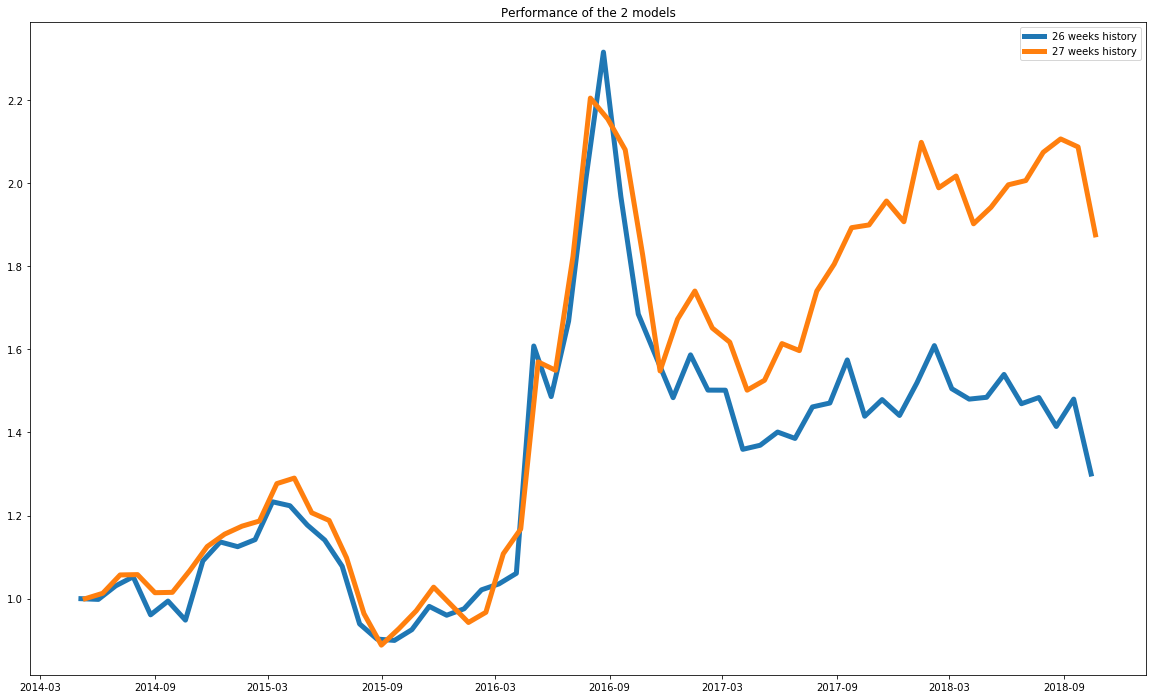

In [42]:
fig, ax1 = plt.subplots(1, 1, figsize=(20,12))
ax1.plot(posX, results, linewidth=5.0, label="26 weeks history")
ax1.plot(posX2, results2, linewidth=5.0, label="27 weeks history")
plt.title("Performance of the 2 models")
plt.legend()
plt.show()

And in such case the performance is :

In [43]:
p = np.exp(np.log(results2[-1])/len(results2))**12
print("Perfs annuelles lissées : {:.3f}%".format((p-1)*100))

Perfs annuelles lissées : 13.647%


More than twice the performance.. this is very unstable

# Remove outliers

Before to conclude we can also have a look at what happend if we don't have a huge peak like we have in 09/2016. To do so, we can clip the monthly performance. Let's do it on the 2nd model

In [137]:
results = np.array(results2)
clip_value = 0.15
monthly_perfs = results[1:] / results[:-1]
clipped_perfs = np.clip(monthly_perfs, a_min = 1-clip_value, a_max=1+clip_value)
clipped_results = np.append([1], np.cumprod(clipped_perfs))

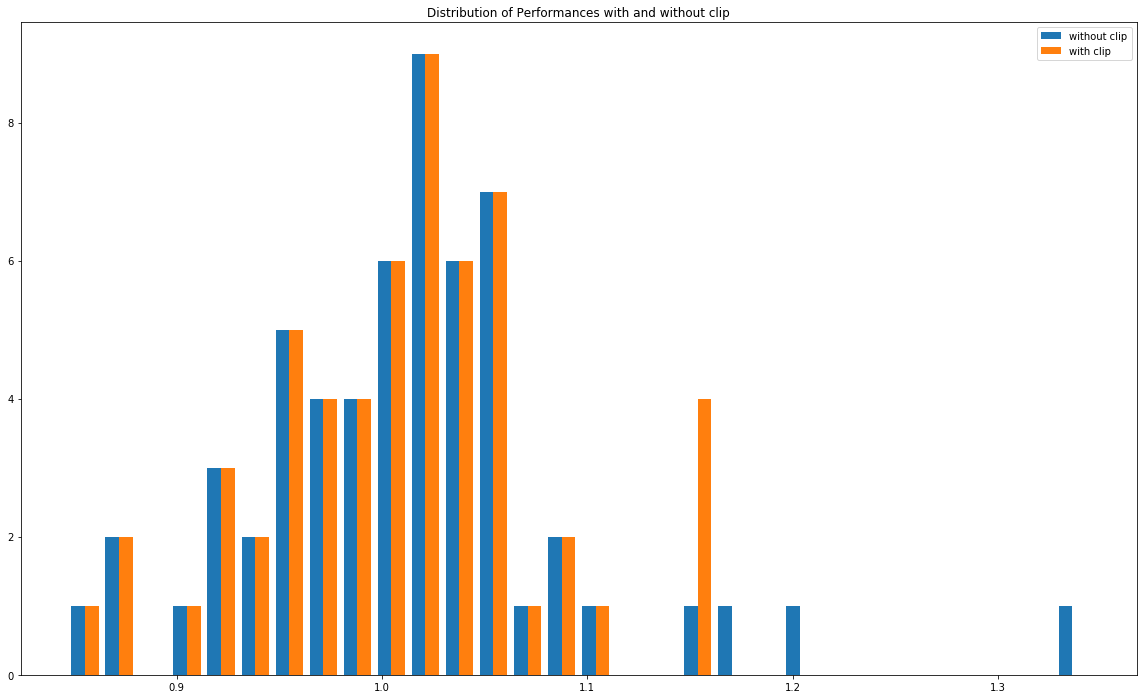

In [145]:
plt.figure(figsize=(20,12))
plt.hist([monthly_perfs, clipped_perfs], bins=30, label = ["without clip", "with clip"])
plt.title("Distribution of Performances with and without clip")
plt.legend()
plt.show()

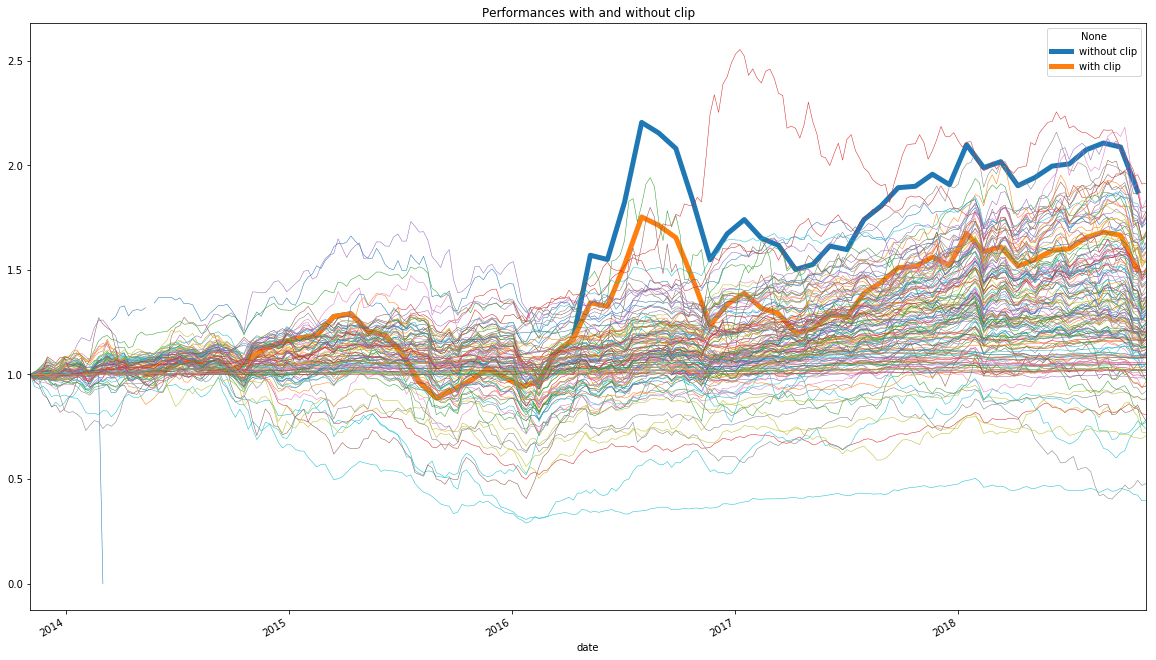

In [148]:
fig, ax = plt.subplots(figsize=(20,12))
ax.plot(posX2, results2, linewidth=5.0, label = "without clip")
ax.plot(posX2, clipped_results, linewidth=5.0, label = "with clip")
plt.legend()
df.plot(ax=ax,linewidth=0.5, legend=False)
plt.title("Performances with and without clip")
plt.show()

In [152]:
p = np.exp(np.log(clipped_results[-1])/len(clipped_results))**12
print("Perfs annuelles lissées : {:.3f}%".format((p-1)*100))

Perfs annuelles lissées : 8.547%


With clipping, we reduce the performacne from 13.647% to 8.547%... That means the huge peaks gave us around 4% of performances so if it doesn't repeat in the future, we cannot count on such an important performance.

# Conclusion

In this Notebook, the first model (very simple) was created. It tooks in consideration only the performance based on the value prepared on the previous Notebook which is not very accurante (but the objective here is to validate the model only). This model gives a first impression about this method which seems very unstable. 

In the next Notebook, the objective will be to create a better model to use allowing :

- Multiple Portfolios
- Use Open and Close prices to buy/sell ETFs based on the performance
- Easy trials with multiple parameters
- Visuals to check performances
